# Project on climate variation 
## (Allani Mohamed, Bonelli Alberto, Cotting Matthieu)

The data was collected with the Tropical Atmosphere Ocean (TAO) array which was developed by the international Tropical Ocean Global Atmosphere (TOGA) program. The TAO array consists of nearly 70 moored buoys spanning the equatorial Pacific, measuring oceanographic and surface meteorological variables critical for improved detection, understanding and prediction of seasonal-to-interannual climate variations originating in the tropics, most notably those related to the El Nino/Southern Oscillation (ENSO) cycles.

In this project, we will perform some models for specific meteorological variables in order to make predictions in the future. Then we will make a comparison between these models.

## 1 Data Acquisition


In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#%matplotlib qt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 7)

import warnings
warnings.filterwarnings('ignore')

import sys
import os.path

import pandas as pd

In [2]:
folder = os.path.join('data')

def get_data(directory):
    filename_csv = os.path.join(directory, 'elnino.csv')
    data = pd.read_csv(filename_csv, index_col=0)
    return pd.concat([data], axis=1)

data = get_data(folder)

attributes = data.columns.tolist()
print(attributes)

[' Year', ' Month', ' Day', ' Date', ' Latitude', ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity', ' Air Temp', ' Sea Surface Temp']


In the beginning, we started by exploring our data, by looking at the different features and their interactions.

## 2 Data Exploration

In [3]:
#Renaiming the columns:
data.columns = ['Yr', 'Mon', 'Day', 'Date', 'Lat', 'Long', 'ZW', 'MW', 'Humid', 'AT', 'SST']
attributes = data.columns.tolist()
print(attributes)

['Yr', 'Mon', 'Day', 'Date', 'Lat', 'Long', 'ZW', 'MW', 'Humid', 'AT', 'SST']


In [4]:
data.head()


,Yr,Mon,Day,Date,Lat,Long,ZW,MW,Humid,AT,SST
Observation,,,,,,,,,,,
1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [5]:
data.tail()

,Yr,Mon,Day,Date,Lat,Long,ZW,MW,Humid,AT,SST
Observation,,,,,,,,,,,
178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03
178080,98,6,15,980615,8.95,-140.33,.,.,.,27.09,28.09


In [6]:
data.dtypes

Yr         int64
Mon        int64
Day        int64
Date       int64
Lat      float64
Long     float64
ZW        object
MW        object
Humid     object
AT        object
SST       object
dtype: object

Plotting of all the features, in order to see their variability:

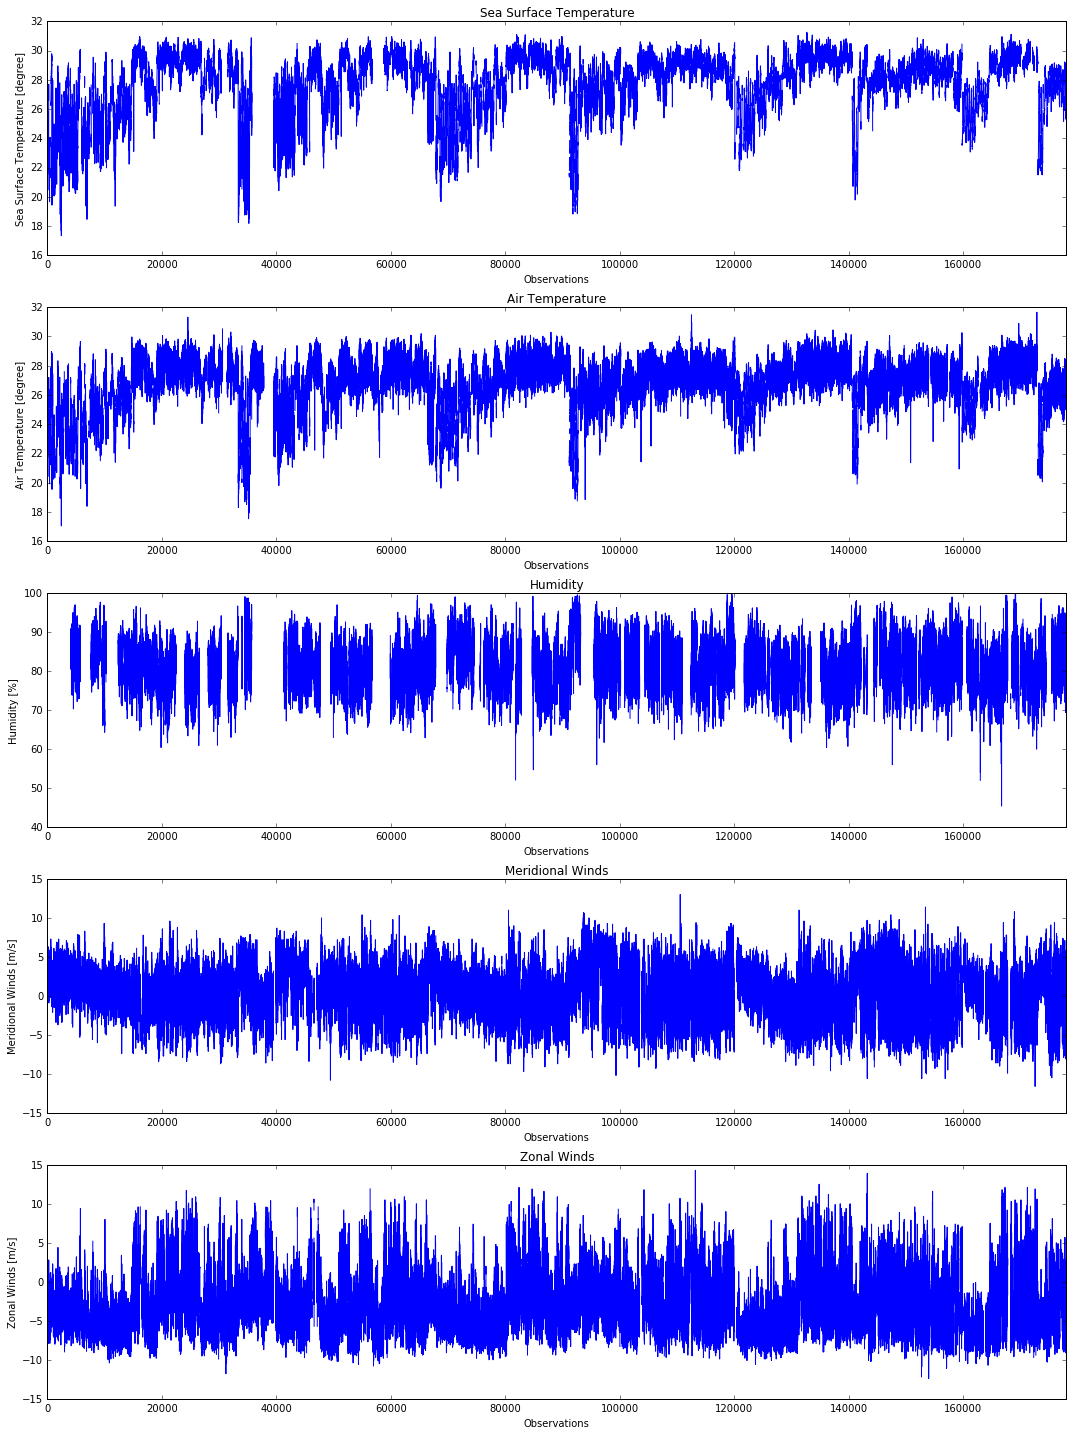

In [7]:
# We convert data types:
data = data.convert_objects(convert_numeric=True)

from utils import plotFeatures

plotFeatures(data)

* We see that there is some missing data, especially for humidity feature.
* We remark some redundant behavior on our data that we can see it clearly with the air temperature and the sea surface temperature features. We can deduce that measures were taken for different years and that the x-axis of observations represents redendant periods of years.

* We also noticed that we haven't the same number of measures because the amount of data recorded was evolving along the years. This is shown clearly with Base Map animation.

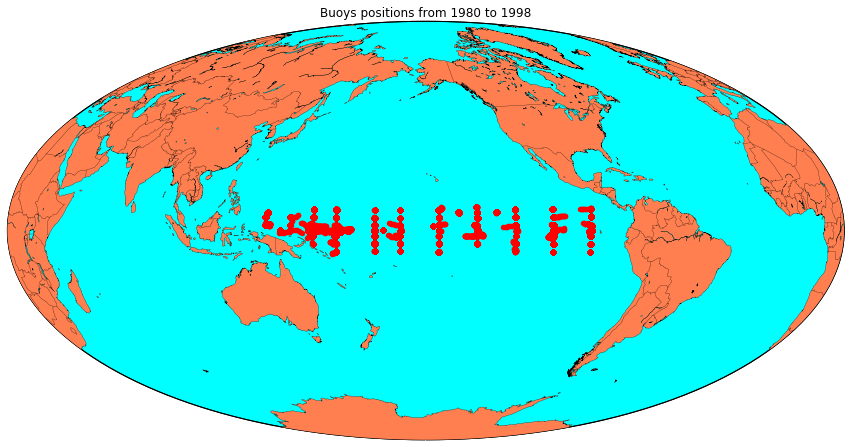

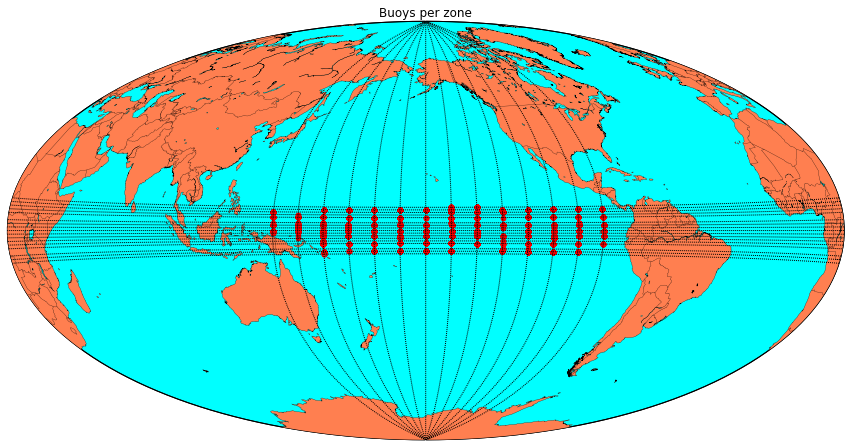

In [8]:
from utils import baseMapResult

longitude, latitude, years = baseMapResult(data)

In [9]:
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
#from utils import _blit_draw

# Modify the function to plot the years dynamicaly
def _blit_draw(self, artists, bg_cache):
    # Handles blitted drawing, which renders only the artists given instead
    # of the entire figure.
    updated_ax = []
    for a in artists:
        # If we haven't cached the background for this axes object, do
        # so now. This might not always be reliable, but it's an attempt
        # to automate the process.
        if a.axes not in bg_cache:
            # bg_cache[a.axes] = a.figure.canvas.copy_from_bbox(a.axes.bbox)
            # change here
            bg_cache[a.axes] = a.figure.canvas.copy_from_bbox(a.axes.figure.bbox)
        a.axes.draw_artist(a)
        updated_ax.append(a.axes)

    # After rendering all the needed artists, blit each axes individually.
    for ax in set(updated_ax):
        # and here
        # ax.figure.canvas.blit(ax.bbox)
        ax.figure.canvas.blit(ax.figure.bbox)

# MONKEY PATCH!!
matplotlib.animation.Animation._blit_draw = _blit_draw
# Animation-------------------------------------------------------
# draw map with markers for float locations
%matplotlib qt

fig=plt.figure()
ax = plt.axes()
ttl = ax.text(0, 1, '', transform = ax.transAxes,fontsize=20)

m = Basemap(projection='hammer',lon_0=180)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=5)[0]

def getLong(i):
    long = []
    for ind,lo in enumerate(longitude):
        if years[ind] == 80+(i%19):
            long.append(lo)
    return long

def getLat(i):
    lat = []
    for ind,lo in enumerate(latitude):
        if years[ind] == 80+(i%19):
            lat.append(lo)
    return lat

def init():
    ttl.set_text('')
    point.set_data([], [])
    return point, ttl

# animation function.  This is called sequentially
def animate(i):
    lons = getLong(i)
    lats = getLat(i)
    x, y = m(lons, lats)
    point.set_data(x, y)
    if i == 19:
        ttl.set_text("Year : " + str(1980))
    else :
        ttl.set_text("Year : " + str(1980+i))
    return point, ttl

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=20, interval=500, blit=True)
plt.show()


* From the Base Map plots, we can also see that the series of buoys in the equatorial Pacific are not always in the same positions.

* Values of latitudes and longitudes in the data showed that the bouys moved around to different locations. The latitude values stayed within a degree from the approximate location. Yet the longitude values were sometimes as far as five degrees off of the approximate location. 

* So in order to rearrange them, we collect groups of buyos in different zones (as shown in the second Base Map figure). These latters were deduced dynamically from the existing latitudes and longitudes by rounding these coordinates. Doing so, we will have a considerable amount of data that will be better regrouped, which will help us in the construction of the predictive model.

* In the next step, we simulated the mean evolution of our features and their standard deviation along the different years:

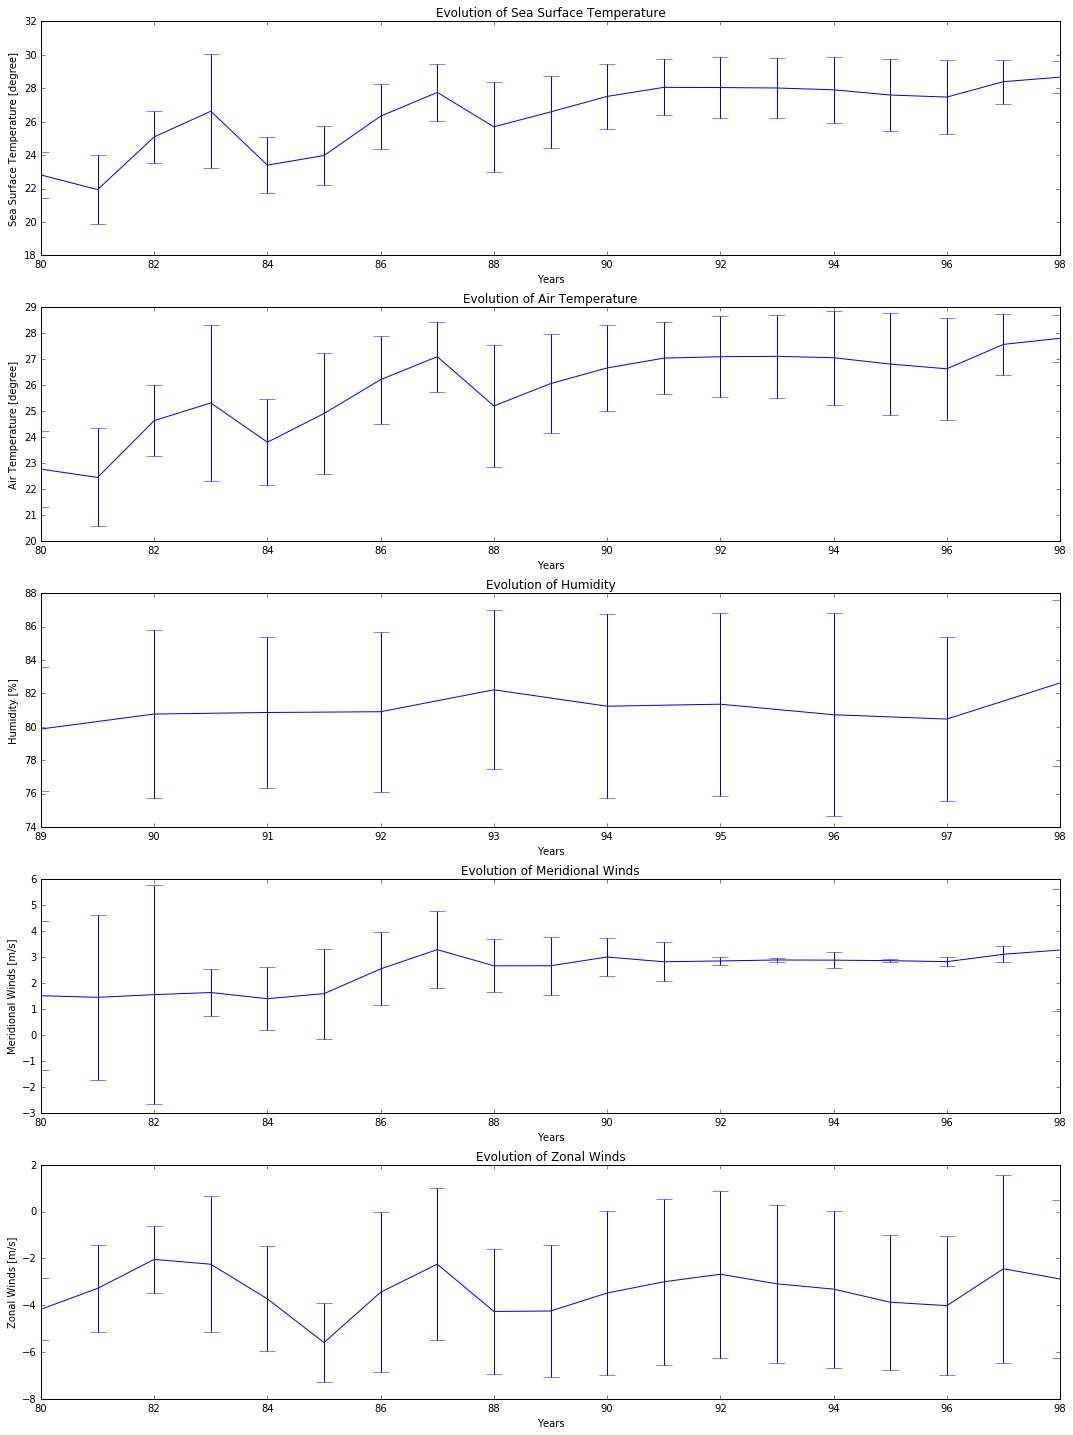

In [10]:
%matplotlib inline
from utils import plotGeneralTendencies

plotGeneralTendencies(data)

 * From these graphs, we observe a clear increase of the air and sea surface temperatures. There is a stagnation in the beginning of the 90's but the increase restarts at the end of this decade.
 
 * We observe also a more or less constant evolution of humidity where it's mentioning that these measures started from 1989 (not like the other features from 1980) until 1998.
 
 * The mean evolution of zonal winds is in the range of negative values and it's are around -4 [m/s]. As explained in the description of the data, negative values for zonal winds means that they are coming from the West.
 
 * For meridional winds, we have almost positive values (which means that they are coming from the North). The speed of these winds raised once from around 1.5 [m/s] to 3 [m/s] from 1985 to 1987. Since this year, the speed of meridional winds is more or less constant.
 
 * We remark also that we have a very high variance. This can be due to the fact that the noise in the full oceanic-atmospheric-land system is significant and can make extraction of coherent signals very challenging. 

Then we try to plot the correlation between each meteorological variable, in order to see if there is any dependancy between them, so that we can select those with the highest correlation to have a better fitting in the prediction model.

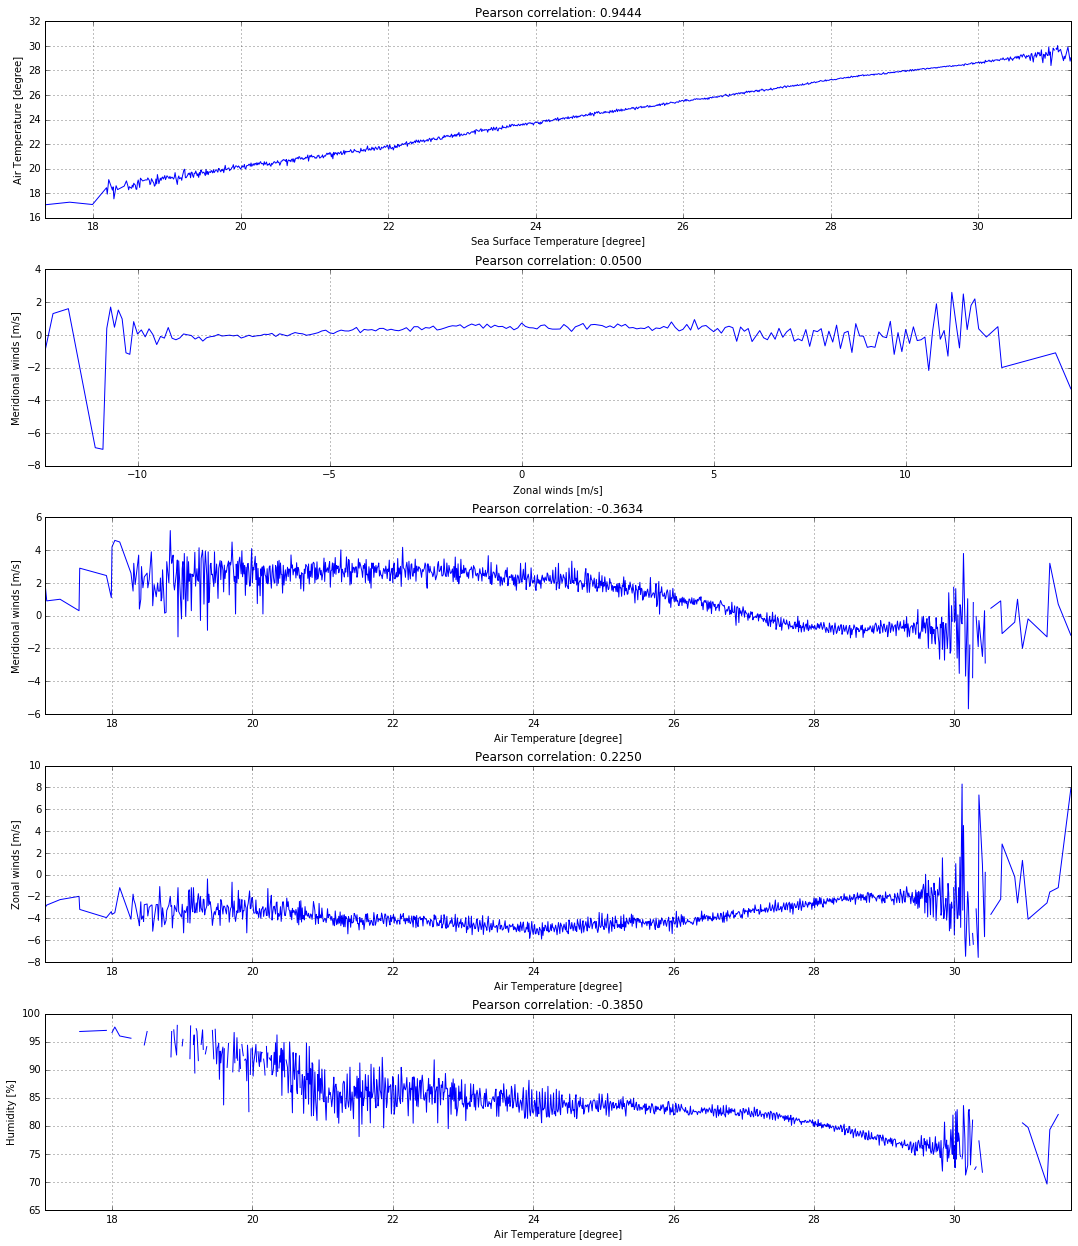

In [11]:
from utils import plotFeaturesCorrelation

plotFeaturesCorrelation(data)

* We see that we have a linear relation between the air and the sea surface temperaures, which indicates a high relation between these two features. That is justified also with the Pearson correlation factor that is close to 1. The closer we are to this value the more dependance we have between features.

* For winds, we see that we have no linear relationship between them. So we conclude that they are independant from each other. This is also proved with the Pearson correlation factor that is close to 0.

* From the plots of correlations between the air temperature and the other meteorological variables (winds and humidity), we see that we don't have a linear relationship between them, which is justified also wih Pearson correlation factor that has a maximum absolute value of 0.385 (but still far from 1).

* And since the air temperature is linear to the sea surface temperature, we can deduce that this latter is also independent from the other meteorological variables.



We try also to plot seperately the correlation beween humidity and winds:

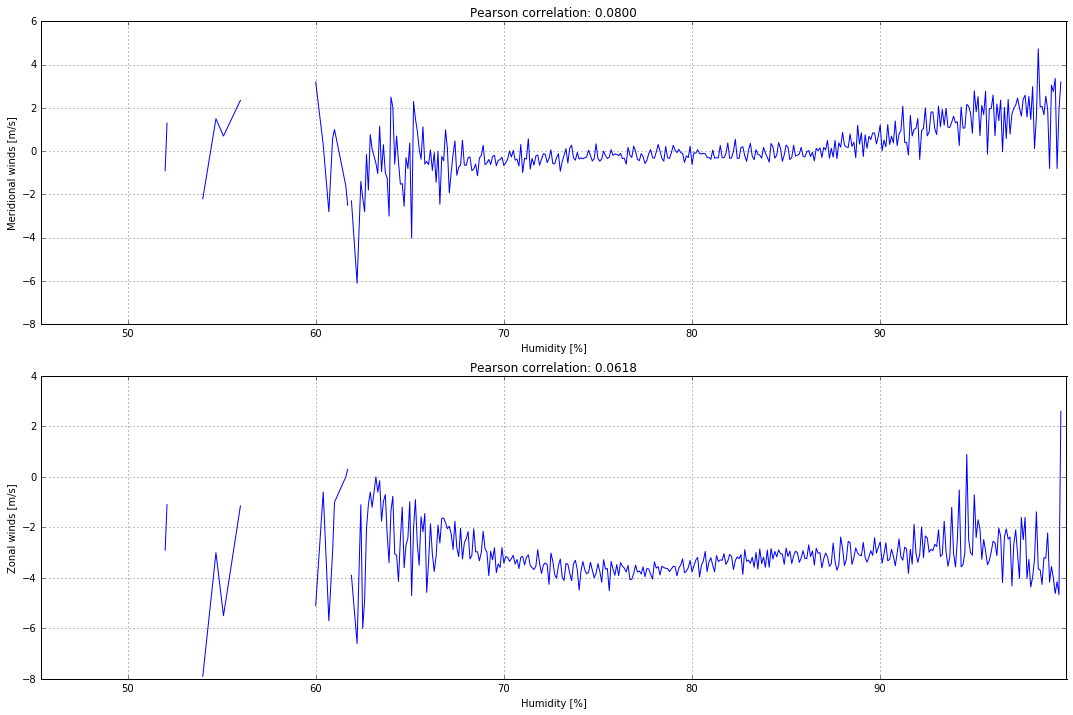

In [12]:
from utils import plotCorrelationHW

plotCorrelationHW(data)

* We see also that the humidity has no correlation with winds as shown with this non linear relation between them and confirmed with the Pearson factors that are close to 0.

### Main results from data exploration when observing the mean evolution for the whole equatorial Pacific zone :

* We conclude that there is only temperature features that are correlated. They are independant from all the other meteorological features. The remaining features are also independant from each other and so it will be useless to implement them in a prediction model in order to estimate the evolution of future temperatures for example.

Now we concentrate on a specific zone to explore its behavior all over the years.

As we have seen before, we tried to better regroup buyos in order to have a well defined zones (see second figure of the Base Map). Then we pick one of these zones where we have the maximum number of measures (of air temperature) and we try to simulate its behavior along the years.

After picking the zone with the highest number of measurements , we try to rearrange our data in order to have an ascending recording of measures in respect of the dates. This will help us to perform a time series prediction.

In [13]:
df_zone = data.copy()
df_zone.sort_index(by=['Lat', 'Long'], ascending=[True, False], inplace=True)

# Round coordinates to create geographical areas
df_zone['Lat_rounded'] = (df_zone['Lat'].round()).astype(int)
df_zone['Long_rounded'] = (((df_zone['Long']*0.1).round())*10).astype(int)

df_zone.head()

,Yr,Mon,Day,Date,Lat,Long,ZW,MW,Humid,AT,SST,Lat_rounded,Long_rounded
Observation,,,,,,,,,,,,,
168550,96,7,6,960706,-8.81,163.18,-8.2,2.7,NaN,28.41,29.34,-9,160
168549,96,7,5,960705,-8.77,163.29,-7.0,0.3,NaN,28.37,29.37,-9,160
168548,96,7,4,960704,-8.69,163.36,-6.4,-2.4,NaN,27.78,29.39,-9,160
168547,96,7,3,960703,-8.60,163.48,-8.1,0.7,NaN,28.41,29.44,-9,160
168546,96,7,2,960702,-8.56,163.60,-7.8,0.4,NaN,28.65,29.43,-9,160


In [14]:
# Delete rows with NaN in 'AT' column
data_zone = df_zone[np.isfinite(df_zone['AT'])]
# Average of features over index
data_zone  = data_zone.groupby(['Yr','Mon','Lat_rounded','Long_rounded']).agg({'AT': 'mean'})

df_zone = df_zone.groupby(['Lat_rounded','Long_rounded','Yr','Mon'], as_index=True).agg({'ZW':'mean','MW':'mean','Humid':'mean','AT':'mean','SST':'mean'})
# Count nbr of valid data of AT for each zone
nb_measures = df_zone.reset_index().groupby(['Lat_rounded','Long_rounded'])['AT'].nunique()
nb_measures_df = pd.DataFrame(nb_measures)
# Extract index of the zone with maximal nbr of data
index_zone = nb_measures_df.idxmax()
coord = index_zone.get_value('AT')

print('Selected zone coordinates: ', coord)

# Take AT values of previous selected zone
data_ts = data_zone.iloc[(data_zone.index.get_level_values('Lat_rounded') == coord[0]) & (data_zone.index.get_level_values('Long_rounded') == coord[1])]

Selected zone coordinates:  (0, -110)


We try to perform an histogram that gives us an intuition about the behavior of the meteorological variable of the selected zone for a specific month (for example the month of July) along the years:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000643B3D9D68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000643A2F32B0>], dtype=object)

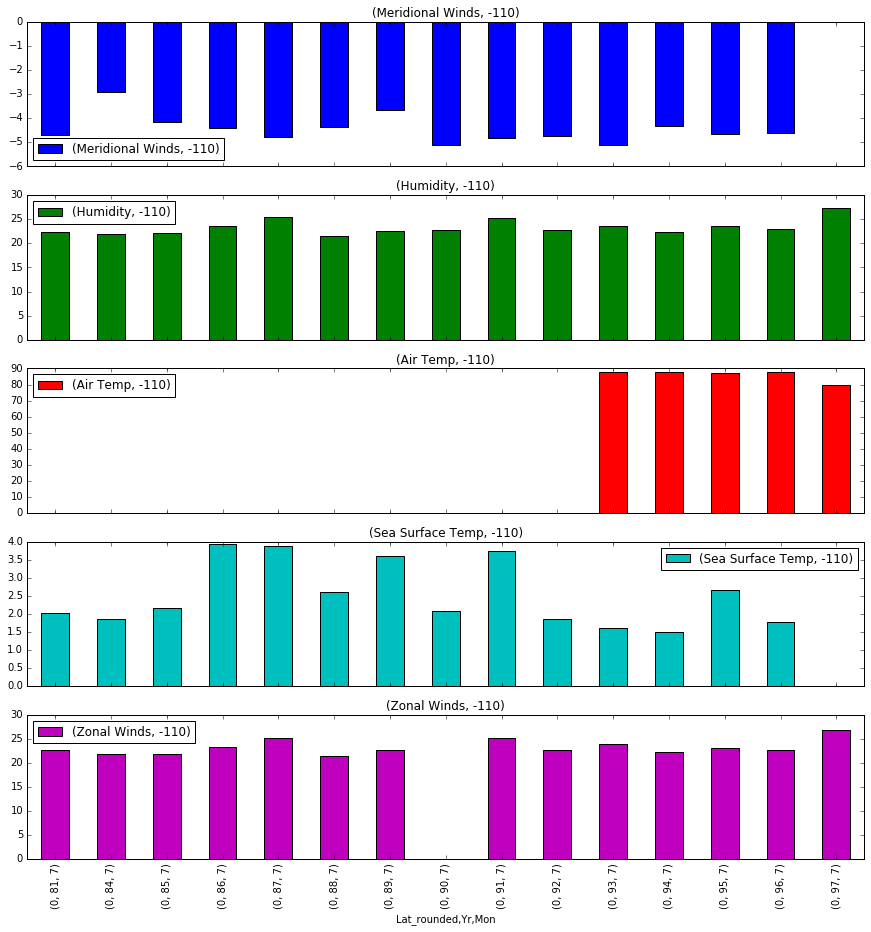

In [15]:
# Select features value for the specific zone:
df_zone_hist = df_zone.iloc[(df_zone.index.get_level_values('Lat_rounded') == coord[0]) & (df_zone.index.get_level_values('Long_rounded') == coord[1])]
# Extracting values for March:
df_lat_long_july = df_zone_hist.iloc[df_zone_hist.index.get_level_values('Mon') == 7]
# Plotting histograms:
rcParams['figure.figsize'] = 15, 15
df_lat_long_july.columns = ['Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp', 'Zonal Winds']
df_lat_long_july.unstack(level=1).plot(kind='bar', subplots=True)


* Here we perform the evolution of each feature for the month of July, at a latitude = 0 and a longitude = -110, evolving along the years (81 for 1981 until 97 for 1997).

* We can see more clearly from these histograms that for some features there is many data that are missing (especially for the humidity).

## 3 Data Exploitation


### 3.1 ARMA (Autoregressive moving average) model

The prediction of the air temperature on a specific zone will be studied in this section, by performing prediction using an ARMA model.

The zone with the largest number of measurments for the air temperature over the years will be considered. The prediction will be done with a time-step of one month.

In [16]:
# Multi index [['Year','Day']] to column of df
data_ts.reset_index(inplace=True) 
# Add column Day for datetime series creation
data_ts['Day'] = data['Day']
data_ts['Day'] = data_ts['Day'].replace(data_ts['Day'],value=1)
# Change year values to required format
data_ts['Yr'] = data_ts['Yr'].add(1900)
data_ts[0:4]

,Yr,Mon,Lat_rounded,Long_rounded,AT,Day
0,1980,3,0,-110,25.793478,1.0
1,1980,8,0,-110,21.878095,1.0
2,1980,9,0,-110,22.167000,1.0
3,1980,10,0,-110,21.278387,1.0


In [17]:
# Convert int values into string
data_ts['Yr'] = data_ts['Yr'].astype(str) 
data_ts['Mon'] = data_ts['Mon'].astype(str)
data_ts['Day'] = data_ts['Day'].astype(str)

# Convert date into datetime values
date_df = pd.to_datetime(pd.DataFrame({'year': data_ts['Yr'],'month': data_ts['Mon'],'day': data_ts['Day']}))
# Set the Date as the index of the df
data_ts.index = date_df
data_ts.index.name = 'Date'

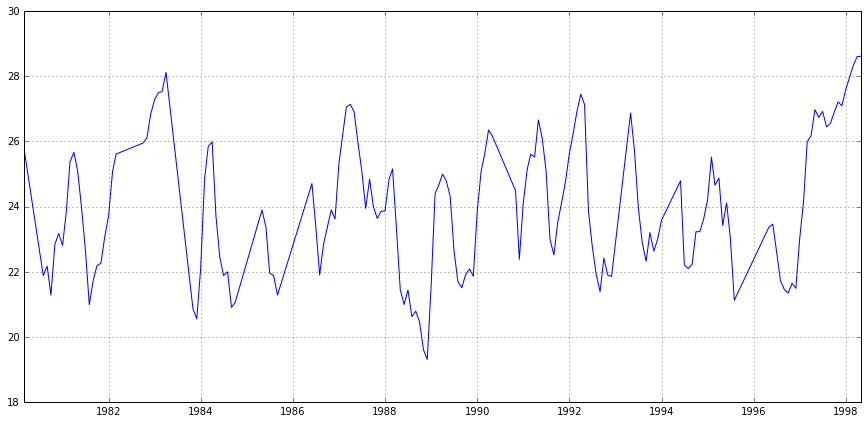

In [18]:
rcParams['figure.figsize'] = (15, 7)
ts = data_ts['AT']
plt.plot(ts)
plt.grid()

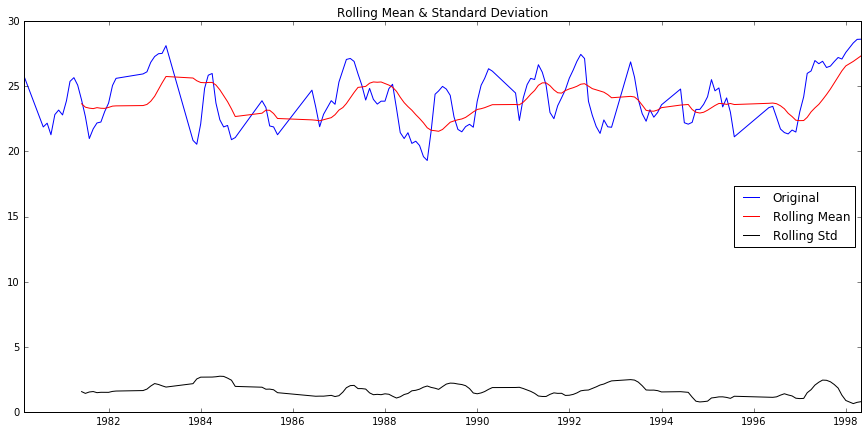

Results of Dickey-Fuller Test:
Test Statistic                  -4.856514
p-value                          0.000042
#Lags Used                       1.000000
Number of Observations Used    164.000000
Critical Value (5%)             -2.879330
Critical Value (1%)             -3.470866
Critical Value (10%)            -2.576255
dtype: float64


In [19]:
from utils import test_stationarity
test_stationarity(ts)

The air temperature seems to be a stationary signal. In fact, no seasonality can be observed and the rolling mean does not have any trend and is almost constant over the interval of time.

The results from the Dickey-Fuller test underline this observation. In fact as the test statistic is small than the 1% critical value, it can be said that the signal is at 99% stationary.

The values of the air temperature can be used directly to create an ARMA model.

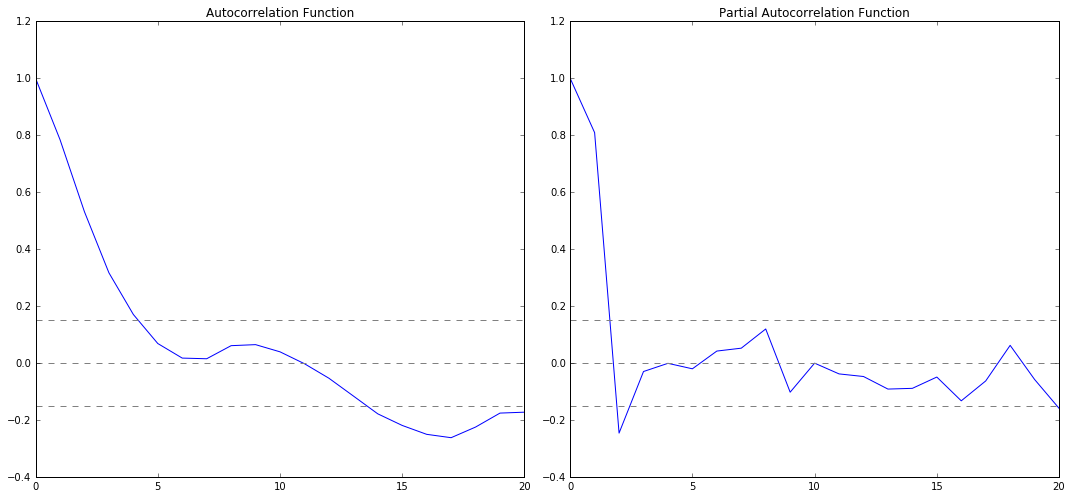

In [20]:
from utils import plotACF_PACF

plotACF_PACF(ts)

From the autocorrelation and the partial autocorrelation functions the parameters (p,d) of the ARMA model can be deduced.

* p : from the partial autocorrelation function the critical value is cutted for around 3 lags.
* d : from the autocorrelation function the critical value is cutted for around 4/5 lags.

When an AR (Auto Regression), MA (Moving Average) and ARMA model were tested with these values, the best results were obtained with p = 5 and d = 5 for an ARMA model. The best result was selected from the RSS (Residual Sum of Squares) value.

C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


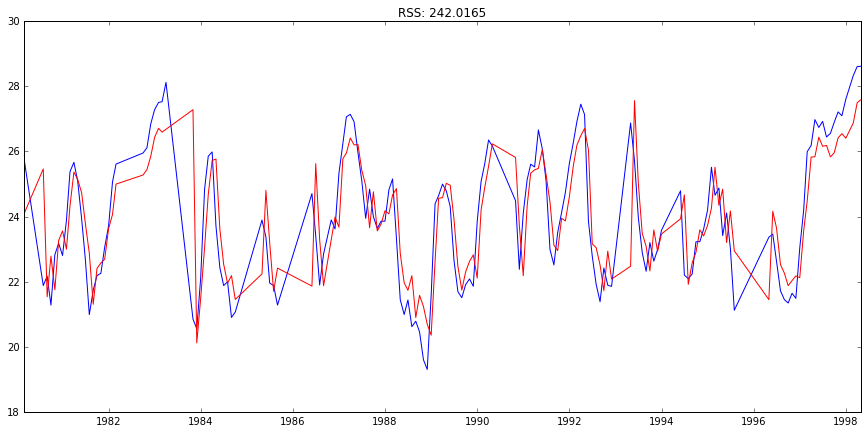

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(5,0,5))  
results_ARIMA = model.fit(disp = -1)
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [22]:
from sklearn.metrics import mean_squared_error

ts = data_ts['AT']

size = int(len(ts) * 0.66)
train, test = ts[0:size], ts[size:len(ts)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,5))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.021317, expected=27.451667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.403002, expected=27.133871


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.933783, expected=23.846000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.647280, expected=22.784516


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.564764, expected=21.915484


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.285194, expected=21.381333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=21.552514, expected=22.417419


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.124442, expected=21.888333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.532456, expected=21.854000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.151544, expected=26.873913


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=27.345494, expected=25.704333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.449324, expected=23.981290


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.647180, expected=22.897742


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.490822, expected=22.316667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.732605, expected=23.199032


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.768190, expected=22.628333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.637589, expected=22.983871


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.481568, expected=23.578333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.475870, expected=24.788750


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.962022, expected=22.200968


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.059512, expected=22.091613


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.099287, expected=22.230667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.141222, expected=23.224194


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.013353, expected=23.227667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.884460, expected=23.614194


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.053878, expected=24.197419


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.403861, expected=25.512000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.242896, expected=24.652581


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.813326, expected=24.874000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.396454, expected=23.414194


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.591561, expected=24.109667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.838099, expected=23.018387


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.572594, expected=21.120000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=21.346084, expected=23.362727


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.893771, expected=23.459000


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.786173, expected=22.616774


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.182856, expected=21.718387


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.107941, expected=21.446333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.447504, expected=21.341613


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.192191, expected=21.640333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.478242, expected=21.486129


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=21.833447, expected=23.037742


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.712479, expected=24.196667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.133803, expected=25.991935


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.937652, expected=26.181333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.608766, expected=26.977097


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.360769, expected=26.734667


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.612342, expected=26.921935


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.966995, expected=26.443333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.346073, expected=26.553333


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=25.624217, expected=26.893548


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.021917, expected=27.213448


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.369900, expected=27.094516


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.415318, expected=27.602581


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.941148, expected=28.327241


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.922510, expected=28.605667
predicted=28.069357, expected=28.616667
Test MSE: 1.567


C:\Users\Alberto Bonelli\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


A train and test set were extracted from the entire data.
The values of the train set are used to estimate one step ahead the value of the air temperature. The estimated value is compared to the one in the test set.

The first value of the test set is then appended to the end of the train set and a new predicition is performed.

The obtained MSE for this zone is of 1.567°C.

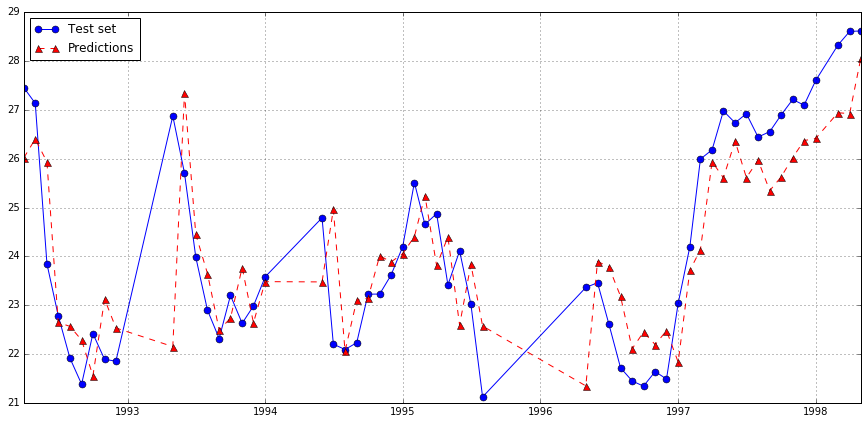

In [23]:
from utils import plotResARMA

plotResARMA(test,predictions)

It can be noticed from the plot that when consecutive data are present the prediction is correct and when several months are missing as between the middle of 1995 and the middle of 1996 the deviation of the prediction and correct value is large.

For a better accuracy of the predictions with time series using the ARMA model, more values with a specific time-step are required.

### 3.2 Regression

#### Pre-processing

In the following we try to predict the air temperature as a function of the position and the time.

We sort the data with respect to time and we clean by removing the columns we are not interested in such as Humidity, Date, Winds and Sea Surface Temperature.

In [24]:
sortedDataElNino = data.copy()
sortedDataElNino = sortedDataElNino.sort(['Date'],ascending=[True])
ReducedData = sortedDataElNino.drop({'Humid','Date','SST','MW','ZW'},axis = 1)
ReducedData = ReducedData[np.isfinite(ReducedData['AT'])]
AirTemp = ReducedData['AT']
X = ReducedData.drop({'AT'},axis = 1)
X.head()

,Yr,Mon,Day,Lat,Long
Observation,,,,,
1,80,3,7,-0.02,-109.46
2,80,3,8,-0.02,-109.46
3,80,3,9,-0.02,-109.46
4,80,3,10,-0.02,-109.46
5,80,3,11,-0.02,-109.46


### Which feature is the most meanigful ?

We fit a linear regression to discover which feature has the greatest influence on the air temperature.

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,AirTemp)
d = {'Features' : X.columns,'Coefficients' : lm.coef_}
coeffs = pd.DataFrame(d)
coeffs

,Coefficients,Features
0,0.145117,Yr
1,-0.047222,Mon
2,0.000045,Day
3,0.014441,Lat
4,0.004320,Long


* From the visualization of the regression coefficients, we see that the air temperature is mostly influenced by years as this latter have the highest coefficient.

We use the 66% of the first data as a train set (past values), and the rest as a test set (future values), in order to make sure to not train on the future.

In [26]:
percTrain = 0.66;
IndexTrainTest = round(percTrain*len(X.index))

X_train = X[0:IndexTrainTest]
Y_train = AirTemp[0:IndexTrainTest]

X_test = X[IndexTrainTest+1:len(X.index)-1]
Y_test = AirTemp[IndexTrainTest+1:len(X.index)-1]

## Regressions

We test several regressions to see which one gives the best fitting.

We try the linear regression, the Ridge regression, the LASSO regression, the ElasticNet regression and polynomial regression (up to a degree of 5).

In [27]:
from utils import RegressLin
from utils import RegressLasso
from utils import RegressRidge
from utils import RegressElasticNet
from utils import RegressPoly

timeLin, trainPredLin, testPredLin = RegressLin(X_train,X_test,Y_train)
timeLas, trainPredLas, testPredLas = RegressLasso(X_train,X_test,Y_train, 1)
timeRidge, trainPredRidge, testPredRidge = RegressRidge(X_train,X_test,Y_train)
timeElastic, trainPredElastic, testPredElastic = RegressElasticNet(X_train,X_test,Y_train)
timePoly5, trainPredPoly5, testPredPoly5 = RegressPoly(X_train,X_test,Y_train,5)
timePoly4, trainPredPoly4, testPredPoly4 = RegressPoly(X_train,X_test,Y_train,4)
timePoly3, trainPredPoly3, testPredPoly3 = RegressPoly(X_train,X_test,Y_train,3)
timePoly2, trainPredPoly2, testPredPoly2 = RegressPoly(X_train,X_test,Y_train,2)

## Metrics and model selection

In order to select the best model, we consider two metrics, 
* The MSE (Mean Squared Error) that gives a measure of the quality of an estimator:

    $\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$

    Where:

    $\hat{Y}_i$: represents the predictions

    $Y_i$: represents the real data
    
    

* The $R^2$ score defined as follow:

    $R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}$

    Where:

    $SS_\text{tot}=\sum_i (y_i-\bar{y})^2$

    $SS_\text{res}=\sum_i (y_i - f_i)^2=\sum_i e_i^2$

    $y_i$ a collection of data, $f_i$ the predicted associated values

    $\bar{y}$: mean of observed data: $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $



$R^2$ represents the goodness of the fit of a model with the real data. When $R^2=1$ means that a regression line perfectly matches the data. 


Let us compare the performance of the regression models :

In [28]:
from utils import metricDisplay

metricDisplay(Y_train,Y_test,trainPredLin,testPredLin,trainPredLas,testPredLas,trainPredRidge,testPredRidge,trainPredElastic,testPredElastic,trainPredPoly5,testPredPoly5,trainPredPoly4,testPredPoly4,trainPredPoly3,testPredPoly3,trainPredPoly2,testPredPoly2)

Results with respect to several regressions : 
----------------------------------------------------------------------------------------
Linear:
Mean squared error, train set :  2.7495849938 , test set :  2.71192132888
R2 score, train set :  0.209645634359 , test set :  0.209645634359
----------------------------------------------------------------------------------------
Lasso:
Mean squared error, train set :  3.47892681224 , test set :  3.00262798816
R2 score, train set :  0.0 , test set :  0.0
----------------------------------------------------------------------------------------
Ridge:
Mean squared error, train set :  2.7495849938 , test set :  2.71192056103
R2 score, train set :  0.209645634359 , test set :  0.209645634359
----------------------------------------------------------------------------------------
ElasticNet:
Mean squared error, train set :  2.81031973241 , test set :  2.56570269158
R2 score, train set :  0.192187739471 , test set :  0.192187739471
-------------------

* The four first regressions give more or less similar results. The best one according to the MSE on the test set is the polynomial regression of degree 2. In the same time, this regression has the highest R2 score (0.58 which is the closest to 1) comparing to the first four models.

* We see that increasing the degree of the regression will induce an overfitting of the data.

We can also have a look at their fitting time.

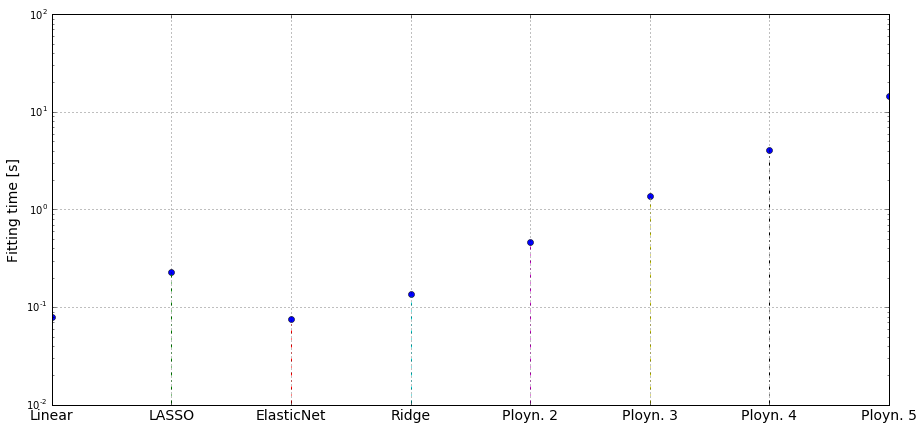

In [29]:
# Display fitting time
x = [1,2,3,4,5,6,7,8]
y = [timeLin,timeLas,timeElastic,timeRidge,timePoly2,timePoly3,timePoly4,timePoly5]
plt.stem(x,y,'-.', markerfmt='bo',linewidth = 9)
plt.ylabel('Fitting time [s]',fontsize=14)
my_xticks = ['Linear','LASSO','ElasticNet','Ridge','Ployn. 2','Ployn. 3','Ployn. 4','Ployn. 5']
plt.xticks(x, my_xticks,fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.show()

* The four first alogorithms take roughly the same amount of time. Concerning the polynomial regressions, we can clearly see an exponential growth of the time as we increase the degree of the polynomial fitting.

Now we can visually assess the quality of the polynomial regression of order 2 by computing the residuals, i.e. the difference between the predicted and the true values and also, in the second graph, the relationship between the measured and predicted values. Idealy, it should follow the black, dashed line.

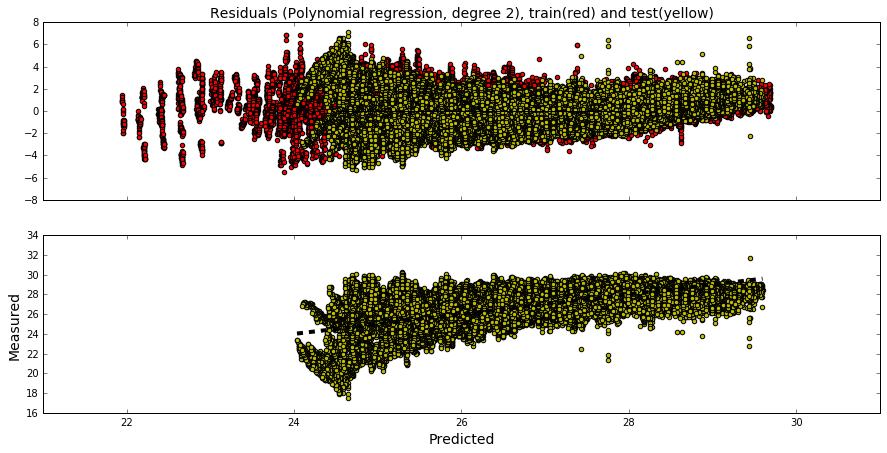

In [30]:
# View of the regression

f, axarr = plt.subplots(2, 1, sharex = True)

#Residuals
axarr[0].scatter(trainPredPoly2,trainPredPoly2-np.array(Y_train).astype(np.float), c='r')
axarr[0].scatter(testPredPoly2,testPredPoly2-np.array(Y_test).astype(np.float), c='y')
axarr[0].hlines(y=0, xmin = 24.5, xmax = 28)
axarr[0].set_title('Residuals (Polynomial regression, degree 2), train(red) and test(yellow)',fontsize = 14)

# Other view
axarr[1].scatter(testPredPoly2,np.array(Y_test).astype(np.float),c='y')
axarr[1].plot([testPredPoly2.min(), testPredPoly2.max()], [testPredPoly2.min(), testPredPoly2.max()], 'k--', lw=4)
axarr[1].set_xlabel('Predicted',fontsize=14)
axarr[1].set_ylabel('Measured',fontsize=14)
plt.show()

* There is no visible trend in the first graph, the points seem to be randomly distributed around zero meaning that the algorithm captured well the influence of the parameters on the air temperature.

## Hyperparameter tuning (for Lasso regression model)

In classical machine learning problem, we can use cross validation to find a suitable hyperparameter.

As we have a time serie, we have to do something else because we cannot predict the past knowing future values.

Train on fold 1 –>  Test on fold 2

Train on fold 1+2 –>  Test on fold 3

Train on fold 1+2+3 –>  Test on fold 4

Train on fold 1+2+3+4 –>  Test on fold 5

Train on fold 1+2+3+4+5 –>  Test on fold 6

Train on fold 1+2+3+4+5+6 –>  Test on fold 7

Train on fold 1+2+3+4+5+6+7 –>  Test on fold 8

Train on fold 1+2+3+4+5+6+7+8 –>  Test on fold 9

Train on fold 1+2+3+4+5+6+7+8+9 –>  Test on fold 10

...

$\Rightarrow$ and then we compute the mean value of the metrics we obtain after each test.

The minimization problem of the Lasso is given by : 

\begin{aligned}
   \min_{w} (\frac{1}{2 n_{samples}} ||y - Xw||^2_2 + \alpha ||w||_1)
\end{aligned}


with y the real data, x the train data and $\alpha$ an hyperparameter that we want to estimate.

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "cross-validation" for time series
nbFolds = 20;
length1Fold = int(np.floor(float(X_train.shape[0]) / nbFolds))

MSETestLas = []
R2TestLas = []
meanMSELas = []
meanR2Las = []
alphas = np.logspace(-7, 1, num=10)
for index,a in enumerate(alphas):
    for i in range(2, nbFolds + 1):
        X = X_train[:(length1Fold*i)]
        y = Y_train[:(length1Fold*i)]
        split = float(i-1)/i
        index = int(np.floor(X.shape[0] * split))

        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]
        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]

        lassoreg = Lasso(alpha=a,normalize=True, max_iter=1e5)

        lassoreg.fit(X_trainFolds,y_trainFolds)

        trainPredLas = lassoreg.predict(X_trainFolds)
        testPredLas = lassoreg.predict(X_testFold)

        MSETestLas.append(mean_squared_error(testPredLas, np.array(y_testFold).astype(np.float)))
        R2TestLas.append(r2_score(np.array(y_testFold).astype(np.float),testPredLas))
        
    meanMSELas.append(np.mean(MSETestLas))
    meanR2Las.append(np.mean(R2TestLas))

The best value of $\alpha$ is where the mean squared error is the smallest or where the $R^2$ score is the closest to one.

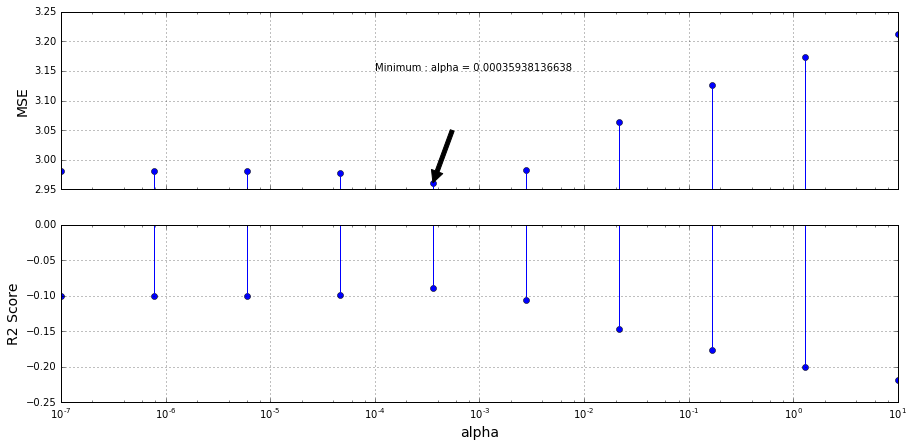

In [32]:
idx_min = meanMSELas.index(min(meanMSELas))
f, axarr = plt.subplots(2, 1, sharex=True)

axarr[0].stem(alphas,meanMSELas)
axarr[0].set_ylim([2.95,3.25])
axarr[0].set_xscale('log')
axarr[0].grid(True)
axarr[0].set_ylabel('MSE',fontsize=14)

axarr[0].annotate('Minimum : alpha = '+str(alphas[idx_min]), xy=(alphas[idx_min], meanMSELas[idx_min]), xytext=(1e-4, 3.15),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
axarr[1].set_xlabel('alpha',fontsize=14)
axarr[1].stem(alphas,meanR2Las)
axarr[1].set_xscale('log')
axarr[1].grid(True)
axarr[1].set_ylabel('R2 Score',fontsize=14)
plt.show()

## Remark

* We see that we always have a negative value of the R2 score because we don't apply this metric to the same data that we used to fit the model. We evaluate R2 score on unseen data (future values).

After optaining the optimal parameter (alpha) for Lasso model, we can know perform its metrics and compared to the previous Lasso model and the polynomial regression model of order 2: 

In [33]:
opt_alpha = alphas[idx_min]
timeLas, trainPredLas, testPredLas = RegressLasso(X_train,X_test,Y_train, opt_alpha)

MSETrainLas = mean_squared_error(trainPredLas, np.array(Y_train).astype(np.float))
MSETestLas = mean_squared_error(testPredLas, np.array(Y_test).astype(np.float))
R2TrainLas = r2_score(np.array(Y_train).astype(np.float),trainPredLas)
R2TestLas = r2_score(np.array(Y_test).astype(np.float),testPredLas)

print('Mean squared error, train set : ',MSETrainLas,', test set : ', MSETestLas)
print('R2 score, train set : ',R2TrainLas,', test set : ',R2TrainLas)



Mean squared error, train set :  2.79534519752 , test set :  2.57906514934
R2 score, train set :  0.196492094148 , test set :  0.196492094148


With $\alpha = 1$, we had:

    Mean squared error, train set :  3.47892681224 , test set :  3.00262798816
    R2 score, train set :  0.0 , test set :  0.0
The new $\alpha$ give better results than the default one.

## Comparaison between the different developed models

* We see that the MSE of the test set for Lasso regression is smaller than the first one, but still worse than the polynomial regression of order 2.

* So we can conclude that, with a split of (2/3) of the data for the train set and the remaining (1/3) for the test set, we have the polynomial regression of order 2 that performs better than the cited regression models performed above.

* We choose this specific split of train and test sets because we want to compare the ARMA model that has this splitting proportionality. This will be performed below:

We start by organizing the data as it was done for the pre-processing of the ARMA model:

In [34]:
sortedDataElNino_2 = data_ts.copy()
AirTemp = sortedDataElNino_2['AT']
X = sortedDataElNino_2.drop({'AT'},axis = 1)
X.head()

,Yr,Mon,Lat_rounded,Long_rounded,Day
Date,,,,,
1980-03-01,1980,3,0,-110,1.0
1980-08-01,1980,8,0,-110,1.0
1980-09-01,1980,9,0,-110,1.0
1980-10-01,1980,10,0,-110,1.0
1980-11-01,1980,11,0,-110,1.0


In [35]:
# We make the same split as done for the ARMA part:
percTrain = 0.66;
IndexTrainTest = round(percTrain*len(X.index))

X_train = X[0:IndexTrainTest]
Y_train = AirTemp[0:IndexTrainTest]

X_test = X[IndexTrainTest+1:len(X.index)-1]
Y_test = AirTemp[IndexTrainTest+1:len(X.index)-1]

In [36]:
# We perform the polynomial regression model of order 2:
timePoly2, trainPredPoly2, testPredPoly2 = RegressPoly(X_train,X_test,Y_train,2)

In [37]:
# We display its metrics:
MSETrainPoly2 = mean_squared_error(trainPredPoly2, np.array(Y_train).astype(np.float))
MSETestPoly2 = mean_squared_error(testPredPoly2, np.array(Y_test).astype(np.float))
R2TrainPoly2 = r2_score(np.array(Y_train).astype(np.float),trainPredPoly2)
R2TestPoly2 = r2_score(np.array(Y_test).astype(np.float),testPredPoly2)

print('Mean squared error, train set : ',MSETrainPoly2,', test set : ', MSETestPoly2)
print('R2 score, train set : ',R2TrainPoly2,', test set : ',R2TrainPoly2)

Mean squared error, train set :  2.88028027491 , test set :  6.2859746698
R2 score, train set :  0.296177837495 , test set :  0.296177837495


* We see that the ARMA model has a lower MSE for the test set (1.567 < 6.285).

* So we can finally conclude that the best regression model between all the performed ones for our data is the ARMA model.